In [19]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries relevant to performance metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from scipy import interp

# Libraries relevant to supervised learning 
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

#importing the data set
dataset = pd.read_csv('D:/project main code/archive(1)/uci_malware_detection.csv')
print(dataset.head())


# Compute the length of the dataset
totalRecords = len(dataset.index)

# One Hot Encode the TLD column
df = dataset.copy(deep=True)
df = df[['TLD']]
df = pd.get_dummies(df,prefix=['TLD'])

# Concating the one hot encodded dataframe to main dataframe
dataset = pd.concat([dataset, df], axis=1)
dataset = dataset.drop(columns=['TLD'])

# Processing the domain names (text)
import re
corpus = []
for i in range(0,totalRecords):
    domains = re.sub('[.]', ' ', dataset['domain'][i])
    domains = domains.lower()
    domains = domains.split()
    domains = ' '.join(domains)
    corpus.append(domains)
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='char', ngram_range=(2, 2)) #bigram initialization
X = cv.fit_transform(corpus).toarray()  # X obtains the corups
Y_class = dataset.iloc[:,dataset.columns.get_loc("class")].values
Y_family = dataset.iloc[:,dataset.columns.get_loc("family_id")].values.astype(int)

# Drop two Y columns from the dataset as well as the domain string column from the dataset
dataset = dataset.drop(columns=['class', 'family_id', 'domain'])

# Concat and create the X properly for the last time
X_temp = dataset.iloc[:,:].values
X = np.column_stack([X, X_temp])

# Clear the memories
del dataset
del df
del X_temp
del corpus

print("Data are processed and ready for classification.")

FileNotFoundError: [Errno 2] No such file or directory: 'D:/project main code/archive(1)/uci_malware_detection.csv'

In [12]:
        # Importing the libraries
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        import tensorflow as tf
        
        # Libraries relavent to performance metrics
        from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
        from sklearn.model_selection import StratifiedKFold
        from scipy import interp
        
        #libraries relavent to supervised learning
        from  sklearn import tree
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LogisticRegression
        
        # Importing the Keras libraries and packages
        from keras.models import Sequential
        from keras.layers import Dense
        from keras.callbacks import EarlyStopping
        
        # Importing the dataset
        dataset = pd.read_csv('D:\project main code\main dataset.csv')
        print(dataset.head())
        
        #compute the length of the dataset
        totalRecords = len(dataset.index)
        
        # One Hot Encode the TLD column
        df = dataset.copy(deep=True)
        df = df[['TLD']]
        df = pd.get_dummies(df,prefix=['TLD'])
        
        # Concating the one hot encoded dataframe to main dataframe
        dataset = pd.concat([dataset, df], axis=1)
        dataset = dataset.drop(columns=['TLD'])
        
        # processing the domain names(text)
        import re
        corpus = []
        for i in range(0,totalRecords):
            domains = re.sub('[.]', ' ', dataset['domain'][i])
            domains = domains.lower()
            domains = domains.split()
            domains = ' '.join(domains)
            corpus.append(domains)
            
        #creating the bag of words model
        from sklearn.feature_extraction.text import CountVectorizer
        cv = CountVectorizer(analyzer='char', ngram_range=(2,2,)) #bigram initilization
        X = cv.fit_transform(corpus).toarray() # X obtains the corpus
        Y_class = dataset.iloc[:,dataset.columns.get_loc("class")].values
        Y_family = dataset.iloc[:,dataset.columns.get_loc("family_id")].values.astype(int)
        
        # Drop two Y columns from the dataset as well as the domain string column from the dataset
        dataset = dataset.drop(columns=['class', 'family_id', 'domain'])
        
        # Concat and create the X properly for the last time
        X_temp = dataset.iloc[:,:].values
        X = np.column_stack([X, X_temp])
        
        # Clear the memories
        del dataset
        del df
        del X_temp
        del corpus
        
        print("Data are processed and ready for classification.")

                                   domain  VT_scan  isNXDomain  perNumChars   
0  2db8677f330df625522ad27fdeff66dd.co.cc        0           0           47  \
1    0e0678b40a0649f0508e3c16ccbbecf8.org        0           0           53   
2  0e0678b40a0649f0508e3c16ccbbecf8.co.cc        0           0           50   
3  16577fc01707152a6ed488da263ef6c6.co.cc        0           0           58   
4    356d3dedfa57bee4a3ccf7df7d3719a6.org        0           0           42   

   VtoC  lenDomain  SymToChar  TLD  family_id  class  
0    20         38         11   cc          1      1  
1    45         36          6  org          1      1  
2    42         38         12   cc          1      1  
3    56         38         14   cc          1      1  
4    54         36          5  org          1      1  
Data are processed and ready for classification.


In [8]:
def LR_classifier(X, Y, numFold):
    
    # Intilization of the figure
    myFig = plt.figure(figsize=[12,10])
    
    # Stratified K-Folds cross-validator
    cv = StratifiedKFold(n_splits=numFold,random_state=None, shuffle=False)
    
    # Initialization of the logistic regression classifier
    classifier = LogisticRegression(random_state=0)
    
    acc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    i = 1
    for train, test in cv.split(X, Y):
        
        # Spliting the dataset
        X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
        
        # Fitting the classifier into training set
        classifier = classifier.fit(X_train, Y_train)
        
        # Breakdown of statistical measure based on classes
        Y_pred = classifier.predict(X_test)
        print(classification_report(Y_test, Y_pred, digits=4))
        
        # Compute the model's performance
        acc_scores.append(accuracy_score(Y_test, Y_pred))
        
        if(len(np.unique(Y)) > 2):
            f1_scores_temp = []
            f1_scores_temp.append(f1_score(Y_test, Y_pred, average=None))
            f1_scores.append(np.mean(f1_scores_temp))
            del f1_scores_temp
            
            precision_scores_temp = []
            precision_scores_temp.append(precision_score(Y_test, Y_pred, average=None))
            precision_scores.append(np.mean(precision_scores_temp))
            del precision_scores_temp
            
            recall_scores_temp = []
            recall_scores_temp.append(recall_score(Y_test, Y_pred, average=None))
            recall_scores.append(np.mean(recall_scores_temp))
            del recall_scores_temp
        
        else:
            f1_scores.append(f1_score(Y_test, Y_pred, average='binary'))
            precision_scores.append(precision_score(Y_test, Y_pred, average='binary'))
            recall_scores.append(recall_score(Y_test, Y_pred, average='binary'))
        
        
        if(len(np.unique(Y)) == 2):
            from sklearn.preprocessing import label_binarize
            Y_train = label_binarize(Y_train, classes = [i for i in range(len(np.unique(Y_train)))])
            Y_test = label_binarize(Y_test, classes = [i for i in range(len(np.unique(Y_test)))])
        
            probas_ = classifier.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(Y_test, probas_[:, 1])
            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, lw=1, color='black', alpha=0.5,
                     label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
            print("Iteration ongoing inside LR method - KFold step: ", i)
            i += 1
    
    if(len(np.unique(Y)) == 2):    
        plt.plot([0,1],[0,1],linestyle = '--',lw = 1, alpha=0.5, color = 'black')
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color='black',
                 label=r'Mean ROC (AUC = %0.3f)' % (mean_auc),
                 lw=2, alpha=0.8)
        
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18, weight='bold')
        plt.ylabel('True Positive Rate', fontsize=18, weight='bold')
        plt.title('Receiver Operating Characteristic (ROC) Curve\nLogistic Regression with Bigram Model', fontsize=20, fontweight='bold')
        plt.legend(loc="lower right",fontsize=14)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.show()
        
        fileName = 'Logistic_Regression_ROC_' + str(numFold) + '_Fold.eps'
        # Saving the figure
        myFig.savefig(fileName, format='eps', dpi=1200)
    
    
    # Statistical measurement of the model
    print("Accuracy: ", np.mean(acc_scores))
    print("Precision: ", np.mean(precision_scores))
    print("Recall: ", np.mean(recall_scores))
    print("F1: ", np.mean(f1_scores))
    if(len(np.unique(Y)) == 2):
        print(acc_scores)
        print(precision_scores)
        print(recall_scores)
        print(f1_scores)

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.4437    0.0684    0.1185      5643
           1     0.4587    0.9020    0.6081      4939

    accuracy                         0.4575     10582
   macro avg     0.4512    0.4852    0.3633     10582
weighted avg     0.4507    0.4575    0.3471     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\3342087551.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside LR method - KFold step:  1


F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.8890    0.2780    0.4236      5643
           1     0.5379    0.9603    0.6896      4939

    accuracy                         0.5965     10582
   macro avg     0.7134    0.6192    0.5566     10582
weighted avg     0.7251    0.5965    0.5477     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\3342087551.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside LR method - KFold step:  2


F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.8749    0.9977    0.9323      5644
           1     0.9969    0.8370    0.9100      4938

    accuracy                         0.9227     10582
   macro avg     0.9359    0.9173    0.9211     10582
weighted avg     0.9318    0.9227    0.9219     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\3342087551.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside LR method - KFold step:  3


F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.9657    0.9972    0.9812      5644
           1     0.9966    0.9595    0.9777      4938

    accuracy                         0.9796     10582
   macro avg     0.9812    0.9783    0.9794     10582
weighted avg     0.9801    0.9796    0.9796     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\3342087551.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside LR method - KFold step:  4


F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.6855    0.9938    0.8114      5644
           1     0.9854    0.4789    0.6446      4938

    accuracy                         0.7535     10582
   macro avg     0.8355    0.7364    0.7280     10582
weighted avg     0.8255    0.7535    0.7335     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\3342087551.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside LR method - KFold step:  5


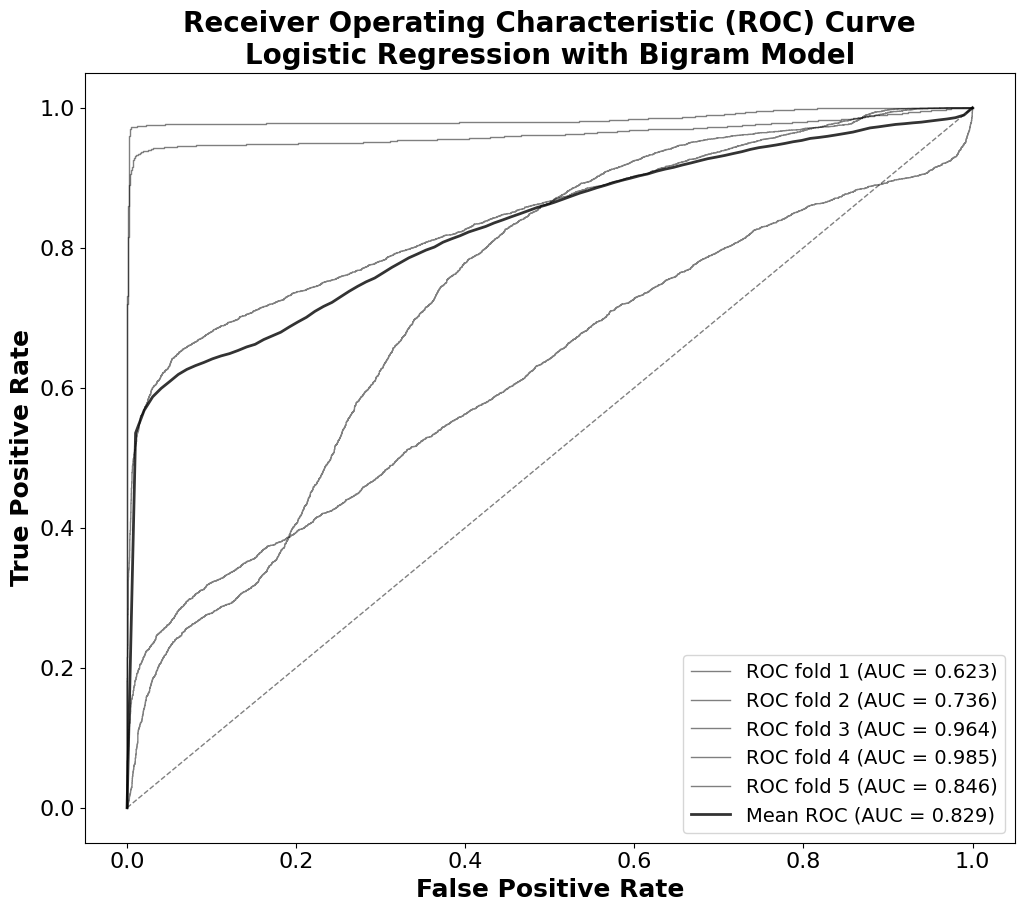

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy:  0.741958041958042
Precision:  0.7951128949548727
Recall:  0.8275470911175475
F1:  0.7659989118673216
[0.4574749574749575, 0.5964845964845965, 0.9226989226989227, 0.9795879795879796, 0.7535437535437536]
[0.45871087314662273, 0.5379380741748894, 0.9968644476603956, 0.9966344131257888, 0.9854166666666667]
[0.9020044543429844, 0.9603158534116217, 0.83697853381936, 0.9594977723774808, 0.47893884163628997]
[0.6081496143607945, 0.6895899970921778, 0.9099515631880228, 0.9777135782088321, 0.6445898064867811]


F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0     0.9273    0.9955    0.9602      3526
           1     0.9339    0.9366    0.9353       347
           2     1.0000    1.0000    1.0000       225
           3     0.8350    0.8350    0.8350       206
           4     0.8108    1.0000    0.8955        30
           5     0.8659    1.0000    0.9281       226
           6     1.0000    0.1346    0.2373        52
           7     0.0000    0.0000    0.0000         2
           8     0.8174    0.8319    0.8246       226
           9     0.8824    0.7500    0.8108        20
          10     0.9676    0.8128    0.8835       625
          11     0.9368    0.7876    0.8558       226
          12     0.9145    0.9588    0.9362       826
          13     0.0000    0.0000    0.0000        10
          14     0.8871    1.0000    0.9402       165
          15     0.5161    0.3200    0.3951       100
          16     0.0000    0.0000    0.0000         1
          17     0.0000    

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to

              precision    recall  f1-score   support

           0     0.9331    0.9892    0.9604      3526
           1     0.8777    0.9335    0.9048       346
           2     0.9956    1.0000    0.9978       226
           3     0.6958    0.8883    0.7804       206
           4     0.6905    0.9667    0.8056        30
           5     0.8621    0.9956    0.9240       226
           6     1.0000    0.3077    0.4706        52
           7     0.0000    0.0000    0.0000         2
           8     0.8047    0.9115    0.8548       226
           9     0.9375    0.7895    0.8571        19
          10     0.9731    0.6933    0.8097       626
          11     0.9888    0.7832    0.8741       226
          12     0.8709    0.9722    0.9188       826
          13     0.0000    0.0000    0.0000         9
          14     0.8405    0.8253    0.8328       166
          15     0.2258    0.0700    0.1069       100
          16     0.0000    0.0000    0.0000         1
          17     0.0000    

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to

              precision    recall  f1-score   support

           0     0.9611    0.9881    0.9744      3526
           1     0.9186    0.8150    0.8637       346
           2     1.0000    1.0000    1.0000       226
           3     0.7423    0.9369    0.8283       206
           4     1.0000    0.3333    0.5000        30
           5     0.8854    0.9956    0.9372       225
           6     1.0000    0.0769    0.1429        52
           7     0.0000    0.0000    0.0000         3
           8     0.8043    0.8186    0.8114       226
           9     0.6667    0.6316    0.6486        19
          10     0.9583    0.8083    0.8769       626
          11     0.9144    0.7566    0.8281       226
          12     0.8766    0.9116    0.8938       826
          13     0.0000    0.0000    0.0000         9
          14     0.7374    0.7952    0.7652       166
          15     0.1250    0.0100    0.0185       100
          16     0.0000    0.0000    0.0000         1
          17     0.0000    

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to

              precision    recall  f1-score   support

           0     0.9613    0.9785    0.9698      3527
           1     0.8410    0.7948    0.8172       346
           2     1.0000    1.0000    1.0000       226
           3     0.7984    0.9463    0.8661       205
           4     0.9000    0.6000    0.7200        30
           5     0.8626    1.0000    0.9262       226
           6     0.8125    0.2500    0.3824        52
           7     0.0000    0.0000    0.0000         3
           8     0.7444    0.8800    0.8065       225
           9     0.5385    0.7000    0.6087        20
          10     0.9492    0.7764    0.8541       626
          11     0.9721    0.7699    0.8593       226
          12     0.8805    0.9382    0.9085       825
          13     0.0000    0.0000    0.0000        10
          14     0.8380    0.9036    0.8696       166
          15     0.7222    0.1300    0.2203       100
          16     0.0000    0.0000    0.0000         1
          17     0.0000    

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to

              precision    recall  f1-score   support

           0     0.9699    0.9697    0.9698      3527
           1     0.8466    0.8613    0.8539       346
           2     1.0000    1.0000    1.0000       226
           3     0.7395    0.9415    0.8283       205
           4     1.0000    0.2000    0.3333        30
           5     0.8687    0.9956    0.9278       226
           6     0.9643    0.5192    0.6750        52
           7     0.0000    0.0000    0.0000         2
           8     0.8621    0.8850    0.8734       226
           9     0.5455    0.9000    0.6792        20
          10     0.9538    0.7907    0.8646       626
          11     0.8947    0.6800    0.7727       225
          12     0.9104    0.9467    0.9282       826
          13     0.0000    0.0000    0.0000        10
          14     0.8475    0.9036    0.8746       166
          15     0.0294    0.0100    0.0149       100
          17     0.0000    0.0000    0.0000        20
          18     0.8320    

<Figure size 1200x1000 with 0 Axes>

In [9]:
# Calling the logistic regression classifier for binary classification with
# 5-fold cross validation
LR_classifier(X, Y_class, 5)

# Calling the logistic regression classifier for malware family detection
#  with 5-fold cross validation
LR_classifier(X, Y_family, 5)

In [5]:
# Modular function to apply decision tree classifier
def DT_classifier(X, Y, numFold):
    
    # Intilization of the figure
    myFig = plt.figure(figsize=[12,10])
    
    # Stratified K-Folds cross-validator
    cv = StratifiedKFold(n_splits=numFold,random_state=None, shuffle=False)
    
    # Initialization of the decision tree classifier
    classifier = tree.DecisionTreeClassifier()
    
    acc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    i = 1
    for train, test in cv.split(X, Y):
        
        # Spliting the dataset
        X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
        
        # Fitting the classifier into training set
        classifier = classifier.fit(X_train, Y_train)
        
        # Breakdown of statistical measure based on classes
        Y_pred = classifier.predict(X_test)
        print(classification_report(Y_test, Y_pred, digits=4))
        
        # Compute the model's performance
        acc_scores.append(accuracy_score(Y_test, Y_pred))
        if(len(np.unique(Y)) > 2):
            f1_scores_temp = []
            f1_scores_temp.append(f1_score(Y_test, Y_pred, average=None))
            f1_scores.append(np.mean(f1_scores_temp))
            del f1_scores_temp
            
            precision_scores_temp = []
            precision_scores_temp.append(precision_score(Y_test, Y_pred, average=None))
            precision_scores.append(np.mean(precision_scores_temp))
            del precision_scores_temp
            
            recall_scores_temp = []
            recall_scores_temp.append(recall_score(Y_test, Y_pred, average=None))
            recall_scores.append(np.mean(recall_scores_temp))
            del recall_scores_temp
        else:
            f1_scores.append(f1_score(Y_test, Y_pred, average='binary'))
            precision_scores.append(precision_score(Y_test, Y_pred, average='binary'))
            recall_scores.append(recall_score(Y_test, Y_pred, average='binary'))
        
        if(len(np.unique(Y)) == 2):
            probas_ = classifier.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(Y_test, probas_[:, 1])
            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
        
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, lw=1, color='black', alpha=0.5,
                     label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
            print("Iteration ongoing inside DT method - KFold step: ", i)
            i += 1
        
    if(len(np.unique(Y)) == 2):
        plt.plot([0,1],[0,1],linestyle = '--',lw = 1, alpha=0.5, color = 'black')
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color='black',
                 label=r'Mean ROC (AUC = %0.3f)' % (mean_auc),
                 lw=2, alpha=0.8)
        
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18, weight='bold')
        plt.ylabel('True Positive Rate', fontsize=18, weight='bold')
        plt.title('Receiver Operating Characteristic (ROC) Curve\nDecision Tree with Bigram Model', fontsize=20, fontweight='bold')
        plt.legend(loc="lower right",fontsize=14)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.show()
        
        fileName = 'Decision_Tree_ROC_' + str(numFold) + '_Fold.eps'
        # Saving the figure
        myFig.savefig(fileName, format='eps', dpi=1200)
    
    # Statistical measurement of the model
    print("Accuracy: ", np.mean(acc_scores))
    print("Precision: ", np.mean(precision_scores))
    print("Recall: ", np.mean(recall_scores))
    print("F1: ", np.mean(f1_scores))
    if(len(np.unique(Y)) == 2):
        print(acc_scores)
        print(precision_scores)
        print(recall_scores)
        print(f1_scores)

              precision    recall  f1-score   support

           0     0.9606    0.1946    0.3236      5643
           1     0.5185    0.9909    0.6808      4939

    accuracy                         0.5662     10582
   macro avg     0.7396    0.5927    0.5022     10582
weighted avg     0.7543    0.5662    0.4903     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\585614181.py:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside DT method - KFold step:  1
              precision    recall  f1-score   support

           0     0.9978    0.4767    0.6452      5643
           1     0.6255    0.9988    0.7693      4939

    accuracy                         0.7204     10582
   macro avg     0.8117    0.7377    0.7072     10582
weighted avg     0.8240    0.7204    0.7031     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\585614181.py:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside DT method - KFold step:  2
              precision    recall  f1-score   support

           0     0.9257    1.0000    0.9614      5644
           1     1.0000    0.9083    0.9519      4938

    accuracy                         0.9572     10582
   macro avg     0.9629    0.9541    0.9567     10582
weighted avg     0.9604    0.9572    0.9570     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\585614181.py:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside DT method - KFold step:  3
              precision    recall  f1-score   support

           0     0.9641    0.9989    0.9812      5644
           1     0.9987    0.9575    0.9777      4938

    accuracy                         0.9796     10582
   macro avg     0.9814    0.9782    0.9794     10582
weighted avg     0.9803    0.9796    0.9796     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\585614181.py:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside DT method - KFold step:  4
              precision    recall  f1-score   support

           0     0.7133    0.9998    0.8326      5644
           1     0.9996    0.5407    0.7018      4938

    accuracy                         0.7856     10582
   macro avg     0.8565    0.7703    0.7672     10582
weighted avg     0.8469    0.7856    0.7716     10582



C:\Users\Admin\AppData\Local\Temp\ipykernel_12612\585614181.py:60: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside DT method - KFold step:  5


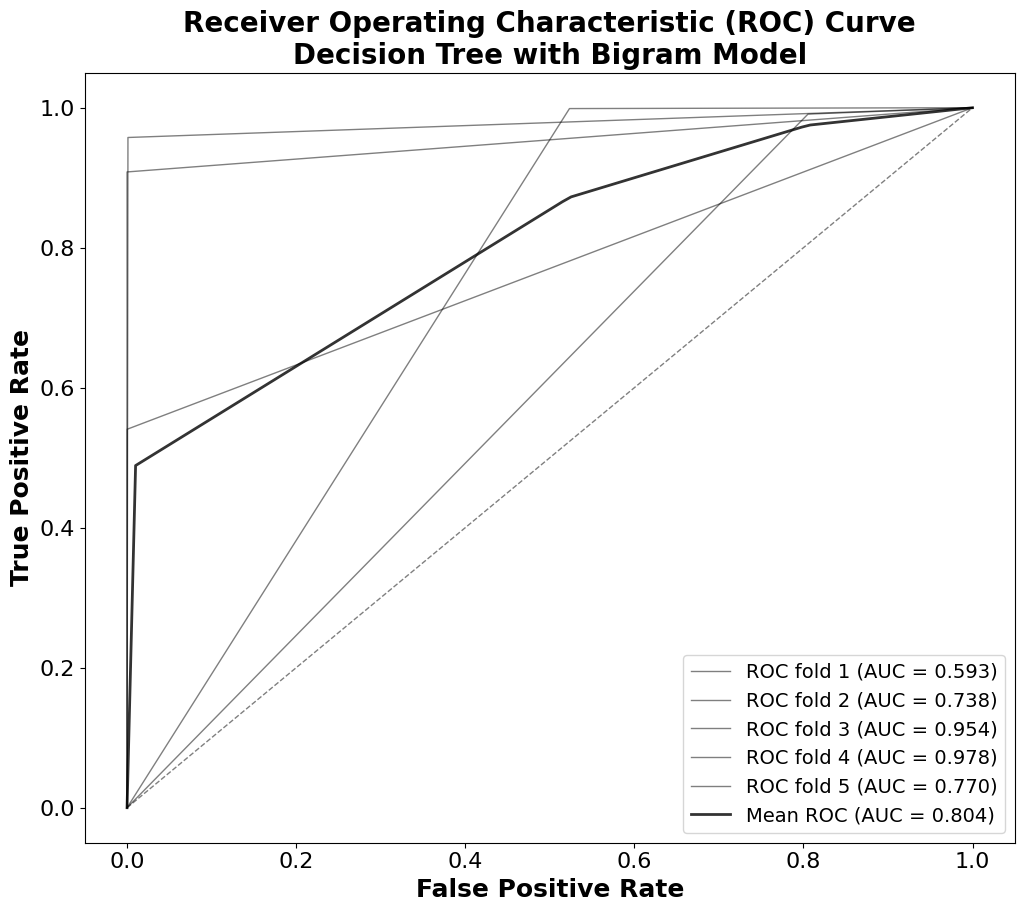

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy:  0.8017955017955017
Precision:  0.8284768477772138
Recall:  0.8792227754547153
F1:  0.8162870319026618
[0.5662445662445662, 0.7203742203742204, 0.9571914571914572, 0.9795879795879796, 0.7855792855792856]
[0.5184871278737154, 0.6255389297489221, 1.0, 0.9987325728770595, 0.9996256083863722]
[0.9908888438955255, 0.99878517918607, 0.9082624544349939, 0.9574726609963548, 0.5407047387606319]
[0.6807622756989845, 0.769278752436647, 0.9519261381725566, 0.9776674937965261, 0.7018004994085951]


In [6]:
# Calling the decision tree classifier for binary classification with
# 5-fold cross validation
DT_classifier(X, Y_class, 5)

In [28]:
# Modular function to apply decision tree classifier
def RF_classifier(X, Y, numFold):
    
    # Intilization of the figure
    myFig = plt.figure(figsize=[12,10])
    
    # Stratified K-Folds cross-validator
    cv = StratifiedKFold(n_splits=numFold,random_state=None, shuffle=False)
    
    # Initialization of the random forest classifier
    classifier = RandomForestRegressor(n_estimators = 100, random_state = 0)
    
    acc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    i = 1
    for train, test in cv.split(X, Y):
        # Spliting the dataset
        X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
        
        # Fitting the classifier into training set
        classifier = classifier.fit(X_train, Y_train)
        
        # Breakdown of statistical measure based on classes
        Y_pred = classifier.predict(X_test)
        Y_pred = (Y_pred > 0.5)
        print(classification_report(Y_test, Y_pred, digits=4))
        
        # Compute the model's performance
        acc_scores.append(accuracy_score(Y_test, Y_pred))
        
        if(len(np.unique(Y)) > 2):
            f1_scores_temp = []
            f1_scores_temp.append(f1_score(Y_test, Y_pred, average=None))
            f1_scores.append(np.mean(f1_scores_temp))
            del f1_scores_temp
            
            precision_scores_temp = []
            precision_scores_temp.append(precision_score(Y_test, Y_pred, average=None))
            precision_scores.append(np.mean(precision_scores_temp))
            del precision_scores_temp
            
            recall_scores_temp = []
            recall_scores_temp.append(recall_score(Y_test, Y_pred, average=None))
            recall_scores.append(np.mean(recall_scores_temp))
            del recall_scores_temp
        
        else:
            f1_scores.append(f1_score(Y_test, Y_pred, average='binary'))
            precision_scores.append(precision_score(Y_test, Y_pred, average='binary'))
            recall_scores.append(recall_score(Y_test, Y_pred, average='binary'))
        
        if(len(np.unique(Y)) == 2):
            probas_ = classifier.predict(X_test)
            fpr, tpr, thresholds = roc_curve(Y_test, probas_[:])
            tprs.append(interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
        
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, lw=1, color='black', alpha=0.5,
                     label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
            print("Iteration ongoing inside RF method - KFold step: ", i)
            i += 1
        
    if(len(np.unique(Y)) == 2):
        plt.plot([0,1],[0,1],linestyle = '--',lw = 1, alpha=0.5, color = 'black')
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, color='black',
                 label=r'Mean ROC (AUC = %0.3f)' % (mean_auc),
                 lw=2, alpha=0.8)
        
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18, weight='bold')
        plt.ylabel('True Positive Rate', fontsize=18, weight='bold')
        plt.title('Receiver Operating Characteristic (ROC) Curve\nRandom Forest with Bigram Model', fontsize=20, fontweight='bold')
        plt.legend(loc="lower right",fontsize=14)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.show()
        
        fileName = 'Random_Forest_ROC_' + str(numFold) + '_Fold.eps'
        # Saving the figure
        myFig.savefig(fileName, format='eps', dpi=1200)
    
    # Statistical measurement of the model
    print("Accuracy: ", np.mean(acc_scores))
    print("Precision: ", np.mean(precision_scores))
    print("Recall: ", np.mean(recall_scores))
    print("F1: ", np.mean(f1_scores))
    if(len(np.unique(Y)) == 2):
        print(acc_scores)
        print(precision_scores)
        print(recall_scores)
        print(f1_scores)

              precision    recall  f1-score   support

           0     0.9894    0.2506    0.3999     14109
           1     0.5379    0.9969    0.6988     12346

    accuracy                         0.5989     26455
   macro avg     0.7636    0.6238    0.5494     26455
weighted avg     0.7787    0.5989    0.5394     26455



C:\Users\Admin\AppData\Local\Temp\ipykernel_2168\1344525168.py:62: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside RF method - KFold step:  1
              precision    recall  f1-score   support

           0     0.8327    0.9989    0.9083     14109
           1     0.9984    0.7707    0.8699     12346

    accuracy                         0.8924     26455
   macro avg     0.9156    0.8848    0.8891     26455
weighted avg     0.9101    0.8924    0.8904     26455



C:\Users\Admin\AppData\Local\Temp\ipykernel_2168\1344525168.py:62: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Iteration ongoing inside RF method - KFold step:  2


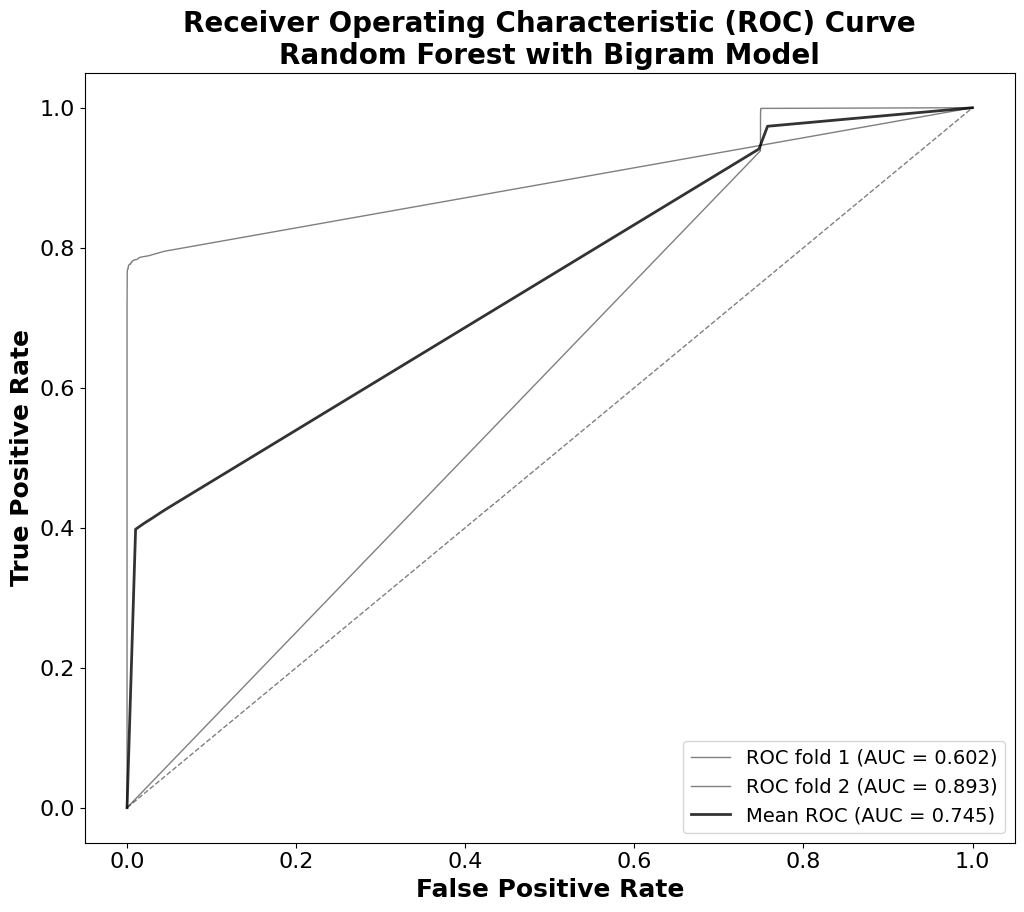

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy:  0.7456624456624457
Precision:  0.7681697879071667
Recall:  0.8838085209784545
F1:  0.7843426371322928
[0.5989037989037989, 0.8924210924210925]
[0.5379135527293387, 0.9984260230849947]
[0.9969220800259193, 0.7706949619309897]
[0.698782184120135, 0.8699030901444506]


In [29]:
# Calling the random forest classifier for binary classification with
# 5-fold cross validation
RF_classifier(X, Y_class, 2)

In [18]:
# Modular function to apply artificial neural network 
def ANN_classifier(X, Y, batchSize, epochCount):
    
    myFig = plt.figure(figsize=[12,10])

    # Spliting the dataset into the Training and Test Set
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=Y)
    
    # Initializing the ANN
    classifier = tf.keras.models.Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units=6, kernel_initializer =  'uniform', activation = 'relu', input_shape=(1, )))
    
    # Adding the second hidden layer
    classifier.add(Dense(units=6, kernel_initializer =  'uniform', activation = 'relu'))
    
    if(len(np.unique(Y)) > 2): # Multi-classification task
        # Adding the output layer
        classifier.add(Dense(output_dim = len(np.unique(Y)),  = kernel_initializer 'uniform', activation = 'softmax'))
        # Compiling the ANN
        classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    else: # Binary classification task
        # Adding the output layer
        classifier.add(Dense(units=1, kernel_initializer =  'uniform', activation = 'sigmoid'))
        # Compiling the ANN
        classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
        # Callback to stop if validation loss does not decrease
        callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
    
        # Fitting the ANN to the Training set
        history = classifier.fit(X_train,
                    Y_train,
                    callbacks=callbacks,
                    validation_split=0.2,
                    batch_size = batchSize,
                    epochs = epochCount,
                    shuffle=True)

    
    # ------ Evaluation -------

    print("ANN using Bigram Model")
        
    # Predicting the Test set results
    #Y_pred = classifier.predict_classes(X_test)
    Y_pred = classifier.predict(X_test)
    Y_pred = (Y_pred > 0.5)

    
    # Breakdown of statistical measure based on classes
    print(classification_report(Y_test, Y_pred, digits=4))
    
    # Compute the model's performance

    # Making the cufusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:\n", cm)
    print("Accuracy: ", accuracy_score(Y_test, Y_pred))
    
    if(len(np.unique(Y))) == 2:
        print("F1: ", f1_score(Y_test, Y_pred, average='binary'))
        print("Precison: ", precision_score(Y_test, Y_pred, average='binary'))
        print("Recall: ", recall_score(Y_test, Y_pred, average='binary'))
    else:
        f1_scores = f1_score(Y_test, Y_pred, average=None)
        print("F1: ", np.mean(f1_scores))
        precision_scores = precision_score(Y_test, Y_pred, average=None)
        print("Precison: ", np.mean(precision_scores))
        recall_scores = recall_score(Y_test, Y_pred, average=None)
        print("Recall: ", np.mean(recall_scores))
    
    # ------------ Print Accuracy over Epoch --------------------

    plt.plot(history.history['acc'], linestyle = ':',lw = 2, alpha=0.8, color = 'black')
    plt.plot(history.history['val_acc'], linestyle = '--',lw = 2, alpha=0.8, color = 'black')
    plt.title('Accuracy over Epoch\nANN', fontsize=20, weight='bold')
    plt.ylabel('Accuracy', fontsize=18, weight='bold')
    plt.xlabel('Epoch', fontsize=18, weight='bold')
    plt.legend(['Train', 'Validation'], loc='lower right', fontsize=14)
    plt.xticks(ticks=range(0, len(history.history['acc'])))
    
    plt.yticks(fontsize=16)
    plt.show()
        
    if(len(np.unique(Y))) == 2:
        fileName = 'ANN_Accuracy_over_Epoch_Binary_Classification.eps'
    else:
        fileName = 'ANN_Accuracy_over_Epoch_Multiclass_Classification.eps'
    
    # Saving the figure
    myFig.savefig(fileName, format='eps', dpi=1200)
    
    # Clear figure
    plt.clf()
    if len(np.unique(Y)) == 2:
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        plt.plot(fpr, tpr, color='black',
                label=r'ROC (AUC = %0.3f)' % (auc(fpr, tpr)),
                lw=2, alpha=0.8)
            
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18, weight='bold')
        plt.ylabel('True Positive Rate', fontsize=18, weight='bold')
        plt.title('Receiver Operating Characteristic (ROC) Curve\nANN', fontsize=20, fontweight='bold')
        plt.legend(loc="lower right",fontsize=14)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.show()
            
        fileName = 'ANN_ROC.eps'
        # Saving the figure
        myFig.savefig(fileName, format='eps', dpi=1200)


In [19]:
# Calling the ANN with batch_size 64 and epoch 100 for binary classification
ANN_classifier(X, Y_class, 64, 100)

# Calling the ANN with batch_size 64 and epoch 100 for multiclass detection
ANN_classifier(X, Y_family, 64, 100)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

<Figure size 1200x1000 with 0 Axes>